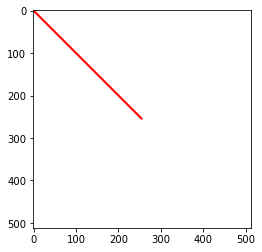

In [1]:
#직선 그리기

#cv2.line(image, start, end, color, thickness)
#start : 시작좌표(2차원)
#end : 종료좌표(2차원)
#thickness : 선의 두께

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.line(image, (0, 0), (255, 255), (255, 0, 0), 3)

plt.imshow(image)
plt.show()


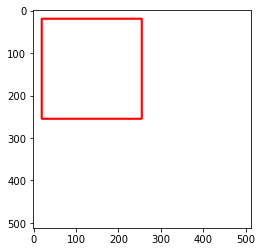

In [3]:
# 사각형 그리기

#cv2.rectangle(image, start, end, color, thickness)

#start와 end는 동일
#thickness : 선의 두께(채우기 : -1)

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.rectangle(image, (20, 20), (255, 255), (255, 0, 0), 3)

plt.imshow(image)
plt.show()

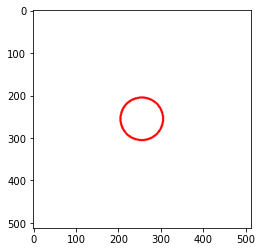

In [5]:
#원 그리기

#cv2.circle(image, center, radian, color, thickness)

#center : 원의 중심
#radian : 반지름
#thickness : 선의 두께

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.circle(image, (255, 255), 50, (255, 0, 0), 3)

plt.imshow(image)
plt.show()

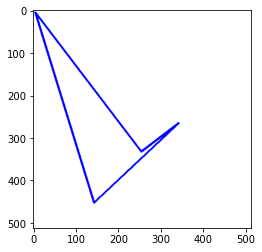

In [7]:
#다각형 그리기

#cv2.polylines(image, points, is_closed, color, thickness)

#points : 꼭지점들
#is_closed : 닫힌 도형 여부

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
points = np.array([[5,5], [143, 452], [342, 265], [254, 332]])
iamge = cv2.polylines(image, [points], True, (0 , 0, 255), 4)

plt.imshow(image)
plt.show()


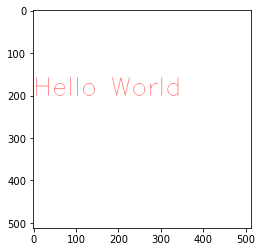

In [8]:
#텍스트 그리기

#cv2.putText(image, text, postion, font_type, font_scale, color)

#postion : 텍스트가 출력될 위치
#font_type :  글씨체
#font_scale : 글씨 크기 가중치

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.putText(image, 'Hello World', (0, 200), cv2.FONT_ITALIC, 2, (255, 0, 0))

plt.imshow(image)
plt.show()

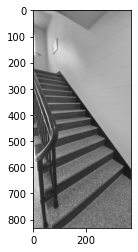

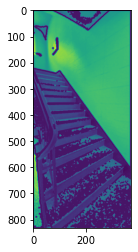

In [22]:
#Contours 찾기(테두리 구분) 
#입력 이미지는 Gray Scale Threshold 전처리 과정 필요

#cv2.findContours(image, mode, method)

#mode : Contour들을 찾는 방법
#RETR_EXTERNAL : 바깥쪽 Line만 찾기
#RETR_LIST : 모든 Line을 찾지만, Hierarchy 구성 x
#RETR_TREE : 모든 Line을 찾으며, 모든 Hierarchy 구성

#method : Contour들을 찾는 근사치 방법
#CHAIN_APPROX_NONE : 모든 Contour 포인트 저장
#CHAIN_APPROX_SIMPLE : Contour Line을 그릴 수 있는 포인트만 저장

#Contour 그리기

#cv2.drawContours(image, contours, contour_index, color, thickness)
#contour_index : 그리고자 하는 Contours Line(전체 :-1)

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 127, 255, 0) #흑과 백으로 이진화 처리

plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (255, 0, 0), 5)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
plt.show()

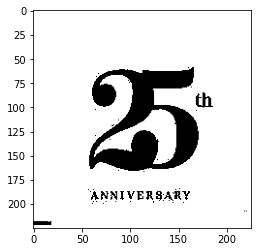

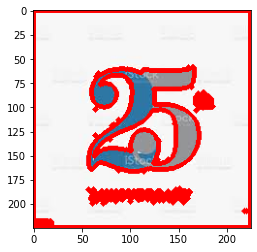

In [34]:
#Contour의 사각형 외각 찾기

#cv2.boundingRect(contour)

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('number.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)#(흑과 백을 바꾸는 반대연산)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

contour = contours[0]
x, y, w, h = cv2.boundingRect(contour)
image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


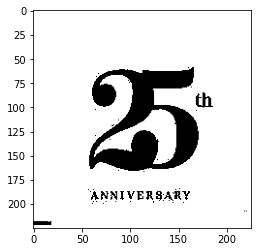

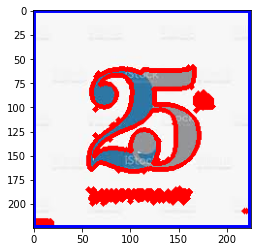

In [35]:
#Contour의 Convex Hull # 대략적인 형태의 외곽을 빠르게 구함

#cv2.convexHull(contour)

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('number.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)#(흑과 백을 바꾸는 반대연산)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

contour = contours[0]
hull = cv2.convexHull(contour)
image = cv2.drawContours(image, [hull], -1, (255, 0, 0), 4)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

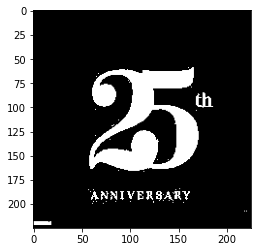

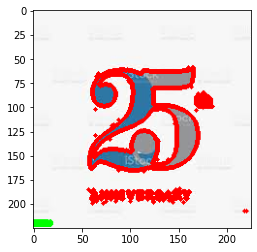

In [37]:
#Contour의 유사 다각형 구하기

#cv2.approxPolyDP(curve, epsilon, closed)
#curve : Contour
#epsilon : 최대 거리 (클수록 Point 개수 감소)
#closed : 폐곡선 여부

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('number.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)#(흑과 백을 바꾸는 반대연산)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

contour = contours[0]
epsilon = 0.01 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

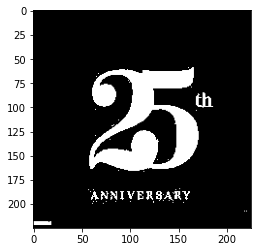

53.0
42.82842707633972
{'m00': 53.0, 'm10': 470.0, 'm01': 11634.666666666666, 'm20': 5575.833333333333, 'm11': 103183.66666666666, 'm02': 2554104.5, 'm30': 74628.0, 'm21': 1224194.3, 'm12': 22653254.0, 'm03': 560699307.4, 'mu20': 1407.9088050314467, 'mu11': 8.32075471697317, 'mu02': 39.057651991955936, 'mu30': 211.47276610892732, 'mu21': 28.56921403465094, 'mu12': -5.121039512198195, 'mu03': -0.8048443794250488, 'nu20': 0.501213529737076, 'nu11': 0.002962176830535126, 'nu02': 0.013904468491262346, 'nu30': 0.01034105319064132, 'nu21': 0.001397039284930742, 'nu12': -0.0002504196779633547, 'nu03': -3.9357023086065275e-05}


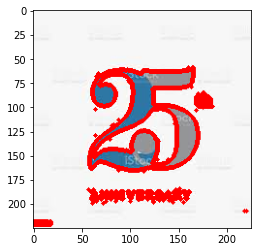

In [38]:
#Contour의 기본 정보

#cv2.contourArea(contour) : contour의 면적
#cv2.arcLength(contour) : contour의 둘레
#cv2.moments(contour) : contour의 특징

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('number.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)#(흑과 백을 바꾸는 반대연산)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

contour = contours[0]
area = cv2.contourArea(contour)
print(area)

length = cv2.arcLength(contour, True)
print(length)

N = cv2.moments(contour)
print(N)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

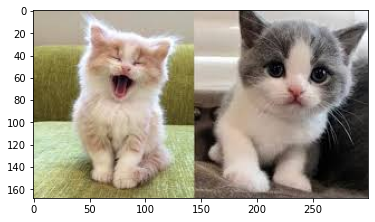

[[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]]


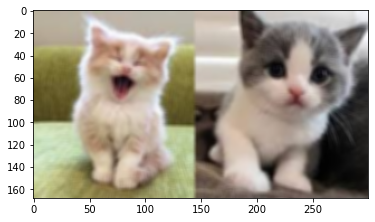

In [40]:
#컨볼루션 계산

#특정한 이미지에서 커널을 적용해 컨볼루션 계산하여 필터링 수행

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

size = 4 # 직접 kernel 만들기
kernel = np.ones((size, size), np.float64) / (size ** 2)
print(kernel)

dst = cv2.filter2D(image, -1, kernel)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()


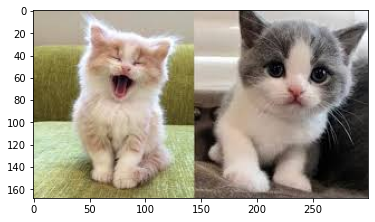

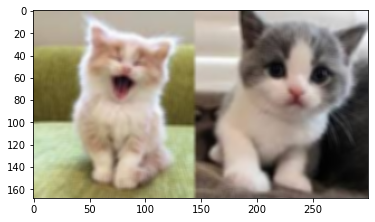

In [41]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

dst = cv2.blur(image, (4, 4)) #블러링 함수
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

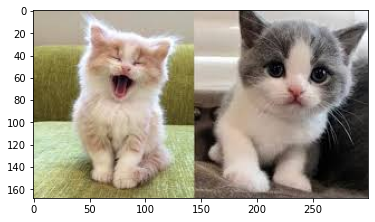

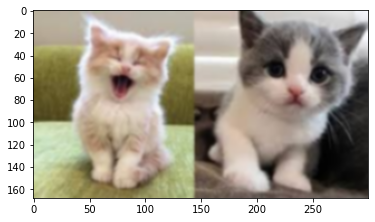

In [42]:
#Gaussian Blur

import cv2

image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#kernel_size : 홀수
dst = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

